In [2]:
import pandas as pd

train_dataset = pd.read_csv('/content/drive/MyDrive/Datavidia/train_dataset_advanced.csv', index_col=0)
X_training_df = train_dataset.drop(labels = ['main-label','main-id'],axis = 1) 
Y_training_df = train_dataset["main-label"]
print('Y_train shape', Y_training_df.shape)
print('X_train shape', X_training_df.shape) 

Y_train shape (14856,)
X_train shape (14856, 15408)


In [3]:
import pandas as pd

test_dataset = pd.read_csv('/content/drive/MyDrive/Datavidia/test_dataset_advanced.csv', index_col=0)
# Drop 'label' column
X_testing_df = test_dataset.drop(labels = ['main-id'],axis = 1)
print('X_test shape', X_testing_df.shape) 

X_test shape (3714, 15408)


In [9]:
X_training = X_training_df.values
Y_training = Y_training_df.values
X_testing = X_testing_df.values

array([], dtype=float64)

In [12]:
from math import sqrt
import numpy as np

#kNN
def euc(data):
  _ , dim = np.array(data).shape
  res = 0
  for i in range(dim):
    res += (data[0][i] - data[1][i]) ** 2
  res = sqrt(res)
  return res

# euc([[1,1,1],[1,1,2]])
def kNN(k, x_train, y_train, x_test):
  for i in x_test:
    dis = np.empty((0,))
    for index,j in enumerate(x_train):
      res = euc(np.array([list(i),list(j)]))
      dis = np.append(dis,res)
      # break
      print(index)
    break
  print(dis)

kNN(5, X_training, Y_training, X_testing)

Streaming output truncated to the last 5000 lines.
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270
8271
8272
8273
8274
8275
8276
8277
8278
8279
8280
8281
8282
8283
8284
8285
8286
8287
8288
8289
8290
8291
8292
8293
8294
8295
8296
8297
8298
8299
8300
8301
8302
8303
8304
8305
8306
8307
8308
8309
8310
8311
8312
8313
8314
8315
8316
8317
8318
8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342
8343
8344
8345
8346
8347
8348
8349
8350
8351
8352
8353
8354
8355
8356
8357
8358
8359
8360
8361
8362
8363
8364
8365
8366
8367
8368
8369
8370
8371
8372
8373
8374
8375

KeyboardInterrupt: ignored

In [ ]:
epochs = 50  # for better result increase the epochs
batch_size = 100
reduce_lr =  ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_delta=1e-4, mode='min',verbose=1)
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Datavidia/model NN-binary (best val_acc).h5",
                             verbose=1, save_best_only=True, monitor='val_accuracy')
# Fit the model
history = model.fit(X_train, Y_train, 
                    epochs = epochs, 
                    validation_data = (X_val,Y_val), 
                    batch_size=batch_size,
                    callbacks=[checkpoint])

Epoch 1/50
168/168 [==============================] - 2s 9ms/step - loss: 0.5752 - accuracy: 0.8215 - val_loss: 0.4147 - val_accuracy: 0.8659

Epoch 00001: val_accuracy improved from -inf to 0.86591, saving model to /content/drive/MyDrive/Datavidia/model NN-binary (best val_acc).h5
Epoch 2/50
168/168 [==============================] - 1s 8ms/step - loss: 0.3873 - accuracy: 0.8799 - val_loss: 0.3469 - val_accuracy: 0.8934

Epoch 00002: val_accuracy improved from 0.86591 to 0.89338, saving model to /content/drive/MyDrive/Datavidia/model NN-binary (best val_acc).h5
Epoch 3/50
168/168 [==============================] - 1s 8ms/step - loss: 0.3256 - accuracy: 0.9038 - val_loss: 0.3044 - val_accuracy: 0.9203

Epoch 00003: val_accuracy improved from 0.89338 to 0.92030, saving model to /content/drive/MyDrive/Datavidia/model NN-binary (best val_acc).h5
Epoch 4/50
168/168 [==============================] - 1s 8ms/step - loss: 0.2774 - accuracy: 0.9250 - val_loss: 0.2739 - val_accuracy: 0.9295

Ep

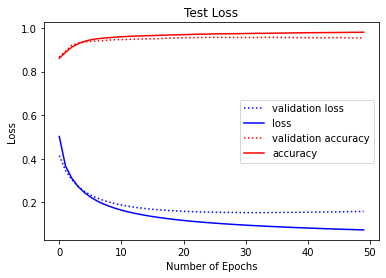

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss", linestyle=':')
plt.plot(history.history['loss'], color='b', label="loss", linestyle='-')
plt.plot(history.history['val_accuracy'], color='r', label="validation accuracy", linestyle=':')
plt.plot(history.history['accuracy'], color='r', label="accuracy", linestyle='-')
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Test Section

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Datavidia/model NN-binary (best val_acc).h5')

In [ ]:
import pandas as pd

test_dataset = pd.read_csv('/content/drive/MyDrive/Datavidia/test_dataset_advanced.csv', index_col=0)
# Drop 'label' column
X_test = test_dataset.drop(labels = ['main-id'],axis = 1)
print('X_test shape', X_test.shape) 

X_test shape (3714, 15408)


In [ ]:
from copy import deepcopy
import numpy as np

def binary_classifier(label):
  temp = deepcopy(label)
  for i in temp:
    if i[0] > 0.5:
      i[0] = 1
    else:
      i[0] = 0
  return temp

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_test.values)
Y_pred_advanced = binary_classifier(Y_pred).astype(int)
# Y_pred_advanced = np.argmax(Y_pred,axis = 1)
Y_pred_advanced = Y_pred_advanced.reshape(-1)
print(Y_pred_advanced)

[0 0 0 ... 0 0 1]


In [ ]:
temp1 = test_dataset['main-id'].values
test_result = list(zip(list(temp1),list(Y_pred_advanced)))
test_result_df = pd.DataFrame(test_result,columns=['review_id','category'])
test_result_df

,review_id,category
0,7302180ac7160f04a405d8aa7bd6beb8,0
1,3184c670e170f565c7522eb76a320ba1,0
2,e33abf6bb5d5a9a77c339043b1725dc8,0
3,061d388950340070a6ac03fabc9027b0,0
4,e62d87c348674b6c06856964f3ab16b8,1
...,...,...
3709,4fac4c272d9194021f921138ebd5b389,0
3710,4fabd4722dd4074841f9656f75105f09,0
3711,44ff89997547d54cccb2a33776181240,0
3712,c46cf84e3665a10199a539fee919edd6,0


In [ ]:
test_result_df.to_csv('/content/drive/MyDrive/Datavidia/test_result-NN-binary.csv', index=False)

#0.2%test 95.6